# 第13章　回帰分析

## はじめに

In [1]:
%pip install -q japanize-matplotlib-jlite
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 88.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## 回帰分析の考え方

### 母集団回帰式

### 標本

### 推定方法

## 消費関数の回帰分析

### データ

コード13.3.1

In [2]:
df = pd.read_csv("data5.csv")
df = df.set_index("year")
df.head(3)

,con,inc,deflator
year,,,
1994,264738.5,397727.4,107.9
1995,270234.8,407167.4,107.5
1996,275890.7,420195.7,107.6


### 名目変数と実質変数

コード13.3.2

In [3]:
df["rcon"] = df["con"] / ( df["deflator"]/100 )
df["rinc"] = df["inc"] / ( df["deflator"]/100 )

### statsmodelsを使う

コード13.3.3

In [4]:
formula = "rcon ~ rinc"           # ステップ1
mod = smf.ols(formula, data=df)   # ステップ2
res = mod.fit()                   # ステップ3

コード13.3.4

In [5]:
res = smf.ols(formula, data=df).fit()   # ステップ2と3

コード13.3.5

In [6]:
print(res.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                   rcon   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.675
No. Observations:                  30   F-statistic:                     61.21
Covariance Type:            nonrobust   Prob (F-statistic):           1.60e-08
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.997e+04   3.05e+04      1.312      0.200   -2.24e+04    1.02e+05
rinc           0.5844      0.075      7.824      0.000       0.431       0.737

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


コード13.3.6

In [7]:
par = res.params
par

,0
Intercept,39965.312116
rinc,0.584354


コード13.3.7

In [8]:
print(par["Intercept"])
# print(par.iloc[0])

39965.312115700275


コード13.3.8

In [9]:
print(par["rinc"])
# print(par.iloc[1])

0.5843542360000699


表13.1

In [10]:
res.params

,0
Intercept,39965.312116
rinc,0.584354


表13.1

In [11]:
res.bse

,0
Intercept,30460.285918
rinc,0.074690


表13.1

In [12]:
res.tvalues

,0
Intercept,1.312047
rinc,7.823699


表13.1

In [13]:
res.pvalues

,0
Intercept,2.001598e-01
rinc,1.600596e-08


表13.1

In [14]:
res.conf_int()

,0,1
Intercept,-22429.755100,102360.379331
rinc,0.431358,0.737350


表13.1

In [15]:
res.nobs

30.0

表13.1

In [16]:
res.rsquared

np.float64(0.6861347746319033)

表13.1

In [17]:
res.rsquared_adj

np.float64(0.6749253022973284)

表13.1

In [18]:
res.fvalue

np.float64(61.21026522502455)

表13.1

In [19]:
res.f_pvalue

np.float64(1.6005958047226866e-08)

表13.1

In [20]:
res.fittedvalues

,0
year,
1994,255362.616067
1995,261295.539977
1996,268165.253792
1997,268572.462759
1998,263785.839226
1999,261673.079281
2000,267658.206333
2001,267717.651236
2002,268861.172125


コード13.3.9

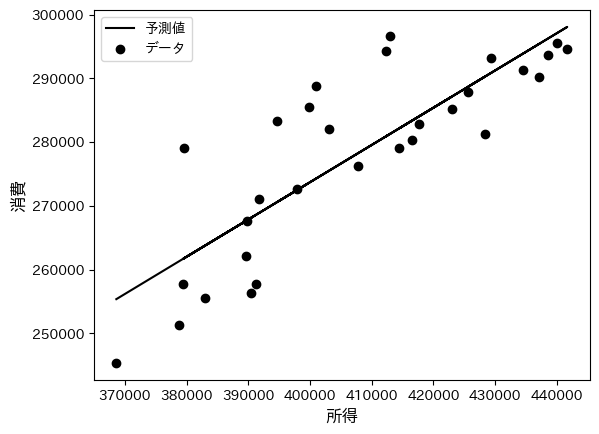

In [21]:
df["fitted"] = res.fittedvalues         # 予測値の列を追加
plt.plot("rinc", "fitted", data=df,     # 回帰直線
          color="black", label="予測値")
plt.scatter("rinc", "rcon", data=df,    # 散布図
            color="black", label="データ")
plt.legend()
plt.xlabel("所得", size=12)
plt.ylabel("消費", size=12)
plt.show()

### 結果の解釈

## 今後の実証分析の学習のために